$\mathcal{P}$

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import stan

from scipy import stats

plt.style.use('seaborn-darkgrid')

In [3]:
# Rodar esse comando antes de import a stan (pystan versão 3.x)
import nest_asyncio
nest_asyncio.apply()

In [4]:
# Data generating data
mu = 70
sigma = 100

data1 = stats.norm(mu, sigma).rvs(1000)

In [5]:
# Essa estrutura está definida na página 77 - SR2

model_data1 = """ 
    // Dado é a variável que foi medida!
    data {   
        int N;
        real y[N];
    }
    
    // Parâmetro é a váriável não observada.
    parameters {  
        real mu;
        real<lower=0> sigma;
    }
    
    model {
        mu ~ normal(60, 10);
        sigma ~ exponential(1);
        
        y ~ normal(mu, sigma);
    }
"""

stan_data1 = {
    'N': len(data1),
    'y': data1,
}

posteriori = stan.build(model_data1, data=stan_data1)
results_data1 = posteriori.sample(num_chains=4, num_samples=1000)

Building: found in cache, done.
Messages from stanc:
Warning in '/tmp/httpstan_4_a2li2y/model_osfmwcg4.stan', line 15, column 20: Argument 60 suggests there may be parameters that are not unit scale; consider rescaling with a multiplier (see manual section 22.12).
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 3.1e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.31 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.29 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 1.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.19 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 3.1e-05 seconds
  

Inference of mu:  68.25114571898543  - Real value:  70
Inference of sigma:  95.92600601158598  - Real value:  100


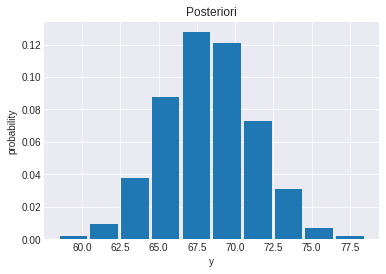

In [5]:
results_data1_mu = np.mean(results_data1['mu'])
results_data1_sigma = np.mean(results_data1['sigma'])

print('Inference of mu: ' , results_data1_mu, ' - Real value: ', mu)
print('Inference of sigma: ', results_data1_sigma, ' - Real value: ', sigma)

plt.hist(results_data1['mu'].flatten(), rwidth=0.9, density=True)
plt.title('Posteriori')
plt.xlabel('y')
plt.ylabel('probability')
plt.show()

### Stan -  Reference Manual

### 1. Comments Char

Comments line: `//` or `#`

Comments in block: `/* ... */`

### 2. Includes

Use `#include` to import stan file in another file.
For example, the `#include my-stan-file-function.stan` on top of file this will be replaced by content in `my-stan-file-function.stan`. 

### 3. Comments

Example:

```data {
  int<lower=0> N;  // number of observations
  array[N] real y;  // observations
}```

### 4. Whitespace

No indentation is need! 

### 5. Data Type and Declarations

All variables should be declared in data type, like c\c++.

Stan is strong and static typing:
1. Force the programmer's declarate a variable.
2. Checking erros in compile time and flags erros.
3. Don't propagate errors ever to the results.

#### 5.1 Overview of data type



**Two primitive data type**: `real` and `int`.


**Complex type**: `complex`, there is a complex number, real and imaginary component, both is `real`.


**Vector and Matrix type:**:  `vector` to column vector, `row_vector` to row vectors, and `matrix`. (To complex type, `complex_vector`, `complex_row_vector` and `complex_matrix`)


**Array types**: Any type can be made into an array type:
    
 - `array[5] real a;` Array, labeled `a`, that have 5 postions with real type;
 
 - `array[10, 2] int b;` Array with 10 lines and 2 columns of the int type, called `b`.
 
 - `array[10, 10, 5] matrix[3, 3] c;` Array with $[10, 10 , 5]$ positions to matrix$[3,3]$ format, called `c`.
 
 - `array[12, 8, 15] complex z;` Declare a array of the complex type.


**Constrained data type**: This variables are parameters, is helpful provided them  with constraints to aid internal check erros.

- `int<lower=0> N;`

- `real<upper=0> log_p;`

- `vector<lower=-1, upper=1>[3] rho;`


There are $4$ constrained vector data type:

1. `simplex` to simple units.

2. `unit-vector` to arrays\[ \] - unit-length vector.

3. `ordered` to ordered vectors.

4. `positive_ordered` to ordered positive vectors


And there are constrained to matrix data type:


1. `corr_matrix` for correlations matrices (*symmetric, positive definite, unit diagonal*)


2. `cov_matrix` for covariance matrices (*symmetric, positive definite*)


3. `cholesky_factor_cov` is the Cholesky factors of covariance matrices(*lower triangular, positive diagonal, product with own transpose is a covariance matrix*)


4. `cholesky_factor_corr` is the Cholesky factors of correlations matrices (*lower triangular, positive diagonal, unit-length rows*)


It's constrains will help check erros only in variables defined in the `data`, `transformed data`, `transformed parameters`, `generate quantities` blocks.

Unconstrained variable will be declared as real type (${\rm I\!R}^n$) by default. 

#### 5.2 Primitive numerical data type

**Integer Precision**: 32-bits (4-bytes) {$-2^{31}$, $2^{31} - 1$}

**Real Precision**: 64-bits (8-bytes), slightly larger than $+/- 10^{307} $, with until 15 decimal digits of accuracy.

**Not-a-number**: returns not-a-number functions errors if argument is not-a-number. And comparison operators: `not-a-number` == true, is *false* for every cases.

**Infinite values**: Great than all numbers, equivalent to negative case.

#### 5.3 Complex numerical data type

- `complex z = 2 - 1.3i;`

- `real re = get_real(z);  // re has value 2.0`

- `real im = get_imag(z);  // im has value -1.3`

Promoting real to complex:

- `real x = 5.0;`

- `complex z = x;  // get_real(z) == 5.0, get_imag(z) == 0`

#### 5.4 Scalar datatype and variable declarations

- `int N;`  Unconstrained

-  `int<lower=1> N;`  $N >= 1, \forall$ $N$ in $\mathbb{Z} $

- `int<lower=0, upper=1> cond;`  $\{0, 1\}$ 

- `real<lower=0> sigma;` $\sigma >=0 $

- `real<upper=-1> x;` $x <= -1$

- `real<lower=-1, upper=1> rho;` $-1 <= \rho <= 1$

- `positive_infinity()` and `negative_infinty()` could be use to set limits, but this values are ignored in Stan.

**Affinely transformed real**: The transformation:
$$x ↦ \mu + \sigma * x$$

- $\mu$: Offset

- $\sigma$: Multiplier (positive)

Like constraint declarations, making the sampling process more efficient. Like a soft constraint:


- `real<offset=1> x;`   $1 + 1 \times x$

- `real<multiplier=2>;`   $0 + 2\times x$

- `real<offset=1, multiplier=2> x;`   $1 + 2\times x$


Example:

```
parameters {
  real<offset=mu, multiplier=sigma> x;
}
model {
  x ~ normal(mu, sigma);
}

```

The theorical model that received the data from $x ~ normal(0, 1)$, can writer in stan model like:

```
parameter {
    real x;  // This x ~ normal(0, 1)
}

model {
    x ~ normal(mu, sigma);
}
```

this code is equivalent to:

```
parameter {
    real<offset=0, multiplier=1> x;  // This x ~ normal(0, 1)
}
model {
    x ~ normal(mu, sigma);
}
```

**Expressions as bounds and offset/multiplier**: We can use the variables, that have been declared before, to setting the values of the offset and multiplier.

```
data {
    real lb;
}
 
parameters {
    rea<lower=lb> phi;
}
```

Variables used in constraints can be any variable that has been defined at the point the constraint is used. For instance:

```
data {
   int<lower=1> N;
   array[N] real y;
}
parameters {
   real<lower=min(y), upper=max(y)> phi;
}
```

**Declaring optional variable**: Variable that depends on a boolean constant.

```
data {
    int<lower=0, upper=1> include_alpha;   // Only {0, 1}
}
parameters {
    vector[include_alpha ? N : 0] alpha;
}
```

If `include_alpha == True` then `alpha` vector exists, else  it will be exclude in output results automaticaly.

#### 5.5 Vector and matrix data types

Three types of container objects: `arrays`, `vector` and `matrix`. Vector and matrices are structure limited, vector 1-dimensional real or complex values. Matrix that two dimensional. Array is not matrix.

######  Vector:

`vector[3] u;`  3-dimensional real vector.

`vector<lower=0>[3] u;`  vector with non-negative values.

`vector<offset=42, multiplier=3>[3] u;` vector with offset and multiplier


###### Complex vectors

`complex_vector[3] v;`

it's do not support any constraints

###### Unit vector
 
`unit_vector[5] theta;` Is declared to be a unit $5-vector$. Useful to validate unit length.


###### Ordered vector

`ordered[5] c;`  All entries are sorted in ascending order. The vector often employed as cut points in oderder logistic regression models.

###### Positive, ordered vector

`positive_ordered[5] d;`  Vector with positive real values and sorted ascending.

###### Row vectors

`row_vector[1093] u;` It's a 1093-dimensional row vector.

`row_vector<lower=-1, upper=1>[10] u;`

`row_vector<offset=-42, multiplier=3>[3] u;` 

###### Complex row Vectors

`complex_row_vector[12] v;` 

Not allow constraints.

###### Matrices

`matrix[M, N] A;` Where $M$ and $N$ are integer type.

`matrix<upper=0>[3, 4] B;` Matrix with positive values.

`matrix<offset=3, multiplier=2>[4, 3] C;` Matrix with offset and multiplier

`matrix<multiplier=2>[4, 3] C;` Matrix with just multiplier.

###### Assigning to rows of matrix

`matrix[M, N] a;`

`row_vector[N] b;`

...

`a[1] = b;`

Copies the values row vector `b` to `a[1]`, where `a[1]` is the first row of matrix `a`.

##### Covariance matrices

`cov_matrix[k] Omega;` It's a $k \times k$ covariance matrix, symmetric and positive definite.

###### Correlation matrices

`corr_matrix[3] Sigma;` symmetric, positive definite has entries between $-1$ and $1$ and has a unit diagonal.

###### Cholesky factor of covariance matrices

This a better than use covariance matrix directly.

`cholesky_factor_cov[4] L;` Where $\Sigma = LL^{T}$ and $\Sigma$ is a covariance matrix.



##### Cholesky factors of positive semi-definite matrices

We also use the general declarations to cholesky factor.

`cholesky_factor_cov[M, N];` To be a positive semi-definite matrices of rank M.

###### Cholesky factors of correlation matrices

`cholesky_factor_corr[k] L;`  Represent Cholesky factor of a correlation matrix.

###### Assigning constrained variables

Constrained are not block to assigning between variable with same primitive data. 

- `real` with `real<lower=0, upper=1>`

- `matrix[3,3]` with `cov_matrix[3]`

- `matrix[3,3]` with `cholesky_factor_cov[3]`

###### Expressions as size declarations

Declare once the data and using in other blocks.

`
data {
    int<lower=0> N_observed, N_missing;
}
transformed parameters {
    vector[N_observed + N_missing] y;
}
`

###### Accessing vector and matrix elements

`
matrix[M, N] m;
row_vector[N] v;
real x;
//...
v = m[2];  // m[2] is row_vector
x = v[3];  // equivalent to x = m[2][3] or x = m[2, 3]
`

###### Array index style

The more efficient form to access array is by `m[2, 3]`.

###### Size declaration restrictions

`vector[M + N] y;`  Also to matrices and arrays.

#### 5.6 Array data type

Support arrays of arbitrary dimensionof the any data type: integer, real, vectors, matrices and others arrays.

To two-dimensional array `a` we can get value by `a[m, n]` or `a[m][n]`.

#### Declaring array variables


- `array[5] int n;` Is five-array integer labeled `n`.


- `array[3, 4] complex a;` two-dimensional array.


- `array[5, 4, 2] real<lower=0> z;` Five rows, four columns and two shelves real greater than zero.


- `array[3] vector[7] mu;`  Array of the vector.


- `array[2, 3, 4] cholesky_factor_cov[5, 6] mu;`

#### Accessing array elements and subarrays

The first index is `1`.


If `array[5] int x;` than the first element is `x[1]` and the last element is `x[5]`.


If `array[3, 4] real y` than `x[3]` is array of lenght `4`.


#### Assingnig

`
array[9, 10, 11] real w;
array[10, 11] real x;
array[11] real y;`

and 

`
x = w[5];
y = x[4];  // y == w[5][4] == w[5, 4]
z = y[3];  // z == w[5][4][3] = w[5, 4, 3]
`

#### Array of matrices and vectors

`
array[3, 4] vector[5] a;
array[4] vector[5] b;
array[5] c;
real x
`

The following assignments are legal:

`
b = a[1];  // b is array of vector
c = a[1, 3];  // c is vector
c = b[3];  c is vector
x = [1, 3, 5];  // x is scalar
x = b[3, 5];
x = c[5];
`

Consider the following matrix, vector and scalar declarations:

`
array[3, 4] matrix[6, 5] d;'
array[4] matrix[6, 5] e;
array[6, 5] f;
row_vector[5] g;
real x;
`

The following assigments are legal:

`
e = d[1];
f = d[1, 3];
f = e[3];
g = d[1, 3, 2];
g = e[3, 2];
g = f[2];
x = d[1, 3, 5, 2];
x = e[3, 5, 2];
x = f[5, 2];
x = g[2];
`


### 6. Expressions

### 7. Statements

`real x = 5;
x += 7;  // value of x is now 12`

In general:

`x op= y;`
`x = x op y;`

With vectors:

`vector[N] x;
x[3] += 2;`

#### 7.4 Sampling Statements

 
**Truncation distribution**

`y ~ normal(0, 1) T[-0.5, 2.1];`  Truncate in both side

`y ~ normal(0, 1) T[-0.5, ];`  Trucate with a lower bounds

`y ~ normal(0, 1) T[ , 2.1];`  Truncate with a upper bounds


Truncate continuos distributions need use `int` or `real` type. For discrete distribution, use only `int`.

##### 7.5 For Loops

`for (n in 1:N) {
    y[n] ~ normal(mu, sigma)
}`

`for (n in L:H)`

Example

`for (n in 2:5){...}`

`n` will be equal to `2, 3, 4 and 5`

#### 7.6 Foreach Loops

IF `ys` is an expression denoting a container (*vector, row vector, matrix or array*), then:

`for (y is ys){
    // ... handling y
}`

- `vector`, `row_vector`, `array[] T`: Elements visited in order

- `matrix`: Elements visited in column-major order

`matrix[2, 3] yss;
for (y in yss){
    // ... handling y
}
`

`y` assuming that order: `y[1,1]`, `y[2,1]`, `y[2, 1]`, ..., `y[2, 3]` 

##### 7.7 Conditional statements

`if (condition1)
    statement1
 else if (conditinal2)
    statement2
 ...
 else if (conditionN-1)
    statementN-1
 else
    statementN
`

##### 7.8 While

`while(condition)
    body
`

##### 7.10  Break and continue statments

`continue` and `break` is used in loops to alter control flow.

`while(1) {
    if (n < 0) {
        break;
    }
    foo(n);
    n = n -1;
}`


`real sum;
sum = 0;

for (n in 1:size(x)) {
    if (x[n] <= 0) {
        continue;
    }
    sum += x[n];
}`

##### 7.11 Print Statements

`for (1 in 1:N) {
    print("loop iteraction: ", n);
}`

##### 7.12 Reject Statements

`reject` is like `print`, but used to report errors os problematic values during.

`if (x < 0) {
    reject("x must not be negative; found x=", x)
}`

#### 8 Program Blocks

All blocks in stan - skeletal Stan Program

`functions{
...}
data{
...}
transformed data{
...}
parameters{
...}
transformed parameters{
...}
model{
...}
generated quantities{
...}
`

-----------------------------

In [89]:
# Modeling Testing
# ================

N = 100
index_var = np.random.randint(2, size=N)

y = [np.random.normal(6, 1) if i == 0 else np.random.normal(3, 1) for i in index_var]

In [104]:
model_test = """
    data {
        int N;
        real y[N];
        int index_var[N];
    }

    parameters {
        real alpha; 
        real beta;
        real<lower=0> sigma;
    }

    model {
        alpha ~ normal(4, 5);
        beta ~ normal(0, 1);
        sigma ~ exponential(1);
        
        for (i in 1:N) {
            y[i] ~ normal(
                alpha + beta * index_var[i],  // mu
                sigma
            );
        }
    }
    
    generated quantities {
        real priori_mu = normal_rng(4, 5);
        real priori_sigma = exponential_rng(1);
        
        real y_priori_sim = normal_rng(priori_mu, priori_sigma);
    }
"""

data_test = {
    'N': N,
    'y': y,
    'index_var': index_var
}

posteriori = stan.build(model_test, data=data_test)
results = posteriori.sample(num_chains=4, num_samples=1000)

# mu = results['mu'].flatten()
alpha = results['alpha'].flatten()
beta = results['beta'].flatten()
sigma = results['sigma'].flatten()

# y_priori_sim = results['y_priori_sim'].flatten()

Building: 0.1s
Building: 0.2s
Building: 0.3s
Building: 0.4s
Building: 0.5s
Building: 0.6s
Building: 0.7s
Building: 0.8s
Building: 0.9s
Building: 1.0s
Building: 1.1s
Building: 1.2s
Building: 1.3s
Building: 1.5s
Building: 1.6s
Building: 1.7s
Building: 1.8s
Building: 1.9s
Building: 2.0s
Building: 2.1s
Building: 2.2s
Building: 2.3s
Building: 2.4s
Building: 2.5s
Building: 2.6s
Building: 2.7s
Building: 2.8s
Building: 2.9s
Building: 3.0s
Building: 3.1s
Building: 3.2s
Building: 3.3s
Building: 3.4s
Building: 3.5s
Building: 3.6s
Building: 3.7s
Building: 3.8s
Building: 3.9s
Building: 4.0s
Building: 4.1s
Building: 4.2s
Building: 4.3s
Building: 4.4s
Building: 4.6s
Building: 4.7s
Building: 4.8s
Building: 4.9s
Building: 5.0s
Building: 5.1s
Building: 5.2s
Building: 5.3s
Building: 5.4s
Building: 5.5s
Building: 5.6s
Building: 5.7s
Building: 5.8s
Building: 5.9s
Building: 6.0s
Building: 6.1s
Building: 6.2s
Building: 6.3s
Building: 6.4s
Building: 6.5s
Building: 6.6s
Building: 6.7s
Building: 6.8s
Building: 

In file included from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/fun.hpp:110,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun.hpp:7,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/rodolpho/.cache/httpstan/4.5.0/models/k57d4by5/model_k57d4by5.cpp:2:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/fun/generalized_inverse.hpp: In function ‘Eigen::Matrix<typename stan::value_type<T>::type, EigMat::ColsAtCompileTime, EigMat::RowsAtCompileTime> stan

Building: 7.0s
Building: 7.1s
Building: 7.2s
Building: 7.3s


In file included from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/fun.hpp:321,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun.hpp:7,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/rodolpho/.cache/httpstan/4.5.0/models/k57d4by5/model_k57d4by5.cpp:2:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/fun/tail.hpp: In function ‘std::vector<T1> stan::math::tail(const std::vector<T1>&, size_t)’:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/sit

Building: 7.4s
Building: 7.5s
Building: 7.7s
Building: 7.8s
Building: 7.9s
Building: 8.0s
Building: 8.1s
Building: 8.2s
Building: 8.3s
Building: 8.4s
Building: 8.5s
Building: 8.6s
Building: 8.7s
Building: 8.8s
Building: 8.9s
Building: 9.0s


In file included from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun.hpp:32,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/rodolpho/.cache/httpstan/4.5.0/models/k57d4by5/model_k57d4by5.cpp:2:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun/cholesky_decompose.hpp: In lambda function:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun/cholesky_decompose.hpp:83:11: warning: typedef ‘using Block_ = class Eigen::Block<Eigen::Matrix<double, -1, -1>, -1, -1, false>’ local

Building: 9.1s
Building: 9.2s
Building: 9.3s
Building: 9.4s
Building: 9.5s
Building: 9.6s
Building: 9.7s


In file included from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun.hpp:74,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/rodolpho/.cache/httpstan/4.5.0/models/k57d4by5/model_k57d4by5.cpp:2:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun/generalized_inverse.hpp: In function ‘auto stan::math::generalized_inverse(const VarMat&)’:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun/generalized_inverse.hpp:64:9: warning: typedef ‘using value_t = stan::value_type_t<T>’

Building: 9.8s
Building: 9.9s


In file included from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun.hpp:121,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev.hpp:10,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/rodolpho/.cache/httpstan/4.5.0/models/k57d4by5/model_k57d4by5.cpp:2:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun/lub_constrain.hpp: In function ‘auto stan::math::lub_constrain(const T&, const L&, const U&)’:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev/fun/lub_constrain.hpp:485:9: warning: typedef ‘using plain_x_array = stan::plain_type_

Building: 10.0s
Building: 10.1s
Building: 10.2s
Building: 10.3s
Building: 10.4s
Building: 10.5s
Building: 10.6s
Building: 10.7s
Building: 10.8s
Building: 11.0s


In file included from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/prob/bernoulli_logit_glm_log.hpp:5,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/prob.hpp:10,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim.hpp:16,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev.hpp:13,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/rodolpho/.cache/httpstan/4.5.0/models/k57d4by5/model_k57d4by5.cpp:2:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/

Building: 11.1s
Building: 11.2s
Building: 11.3s
Building: 11.4s
Building: 11.5s
Building: 11.6s
Building: 11.7s
Building: 11.8s


In file included from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/prob/multi_normal_cholesky_log.hpp:6,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/prob.hpp:196,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim.hpp:16,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev.hpp:13,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/rodolpho/.cache/httpstan/4.5.0/models/k57d4by5/model_k57d4by5.cpp:2:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/ma

Building: 11.9s
Building: 12.0s
Building: 12.1s
Building: 12.2s
Building: 12.3s
Building: 12.4s
Building: 12.5s
Building: 12.6s


In file included from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/prob/ordered_logistic_log.hpp:5,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim/prob.hpp:248,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/prim.hpp:16,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/rev.hpp:13,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math.hpp:19,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/model/model_header.hpp:4,
                 from /home/rodolpho/.cache/httpstan/4.5.0/models/k57d4by5/model_k57d4by5.cpp:2:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/math/pr

Building: 12.7s
Building: 12.8s
Building: 12.9s


In file included from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/model/indexing.hpp:7,
                 from /home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/model/model_header.hpp:17,
                 from /home/rodolpho/.cache/httpstan/4.5.0/models/k57d4by5/model_k57d4by5.cpp:2:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/model/indexing/assign_varmat.hpp: In function ‘void stan::model::assign(Mat1&&, const Mat2&, const char*, const stan::model::index_multi&, const stan::model::index_multi&)’:
/home/rodolpho/Projects/bayesian/BAYES/lib/python3.8/site-packages/httpstan/include/stan/model/indexing/assign_varmat.hpp:329:9: warning: typedef ‘using pair_type = struct std::pair<int, std::vector<int, stan::math::arena_allocator<int> > >’ locally defined but not used [-Wunused-local-typedefs]
  329 |   using pair_type = std::pair<int, arena_vec>;
      |         ^

Building: 13.0s
Building: 13.1s
Building: 13.2s
Building: 13.3s
Building: 13.4s
Building: 13.5s
Building: 13.6s


/home/rodolpho/.cache/httpstan/4.5.0/models/k57d4by5/model_k57d4by5.cpp: In instantiation of ‘void model_k57d4by5_namespace::model_k57d4by5::transform_inits_impl(const stan::io::var_context&, VecI&, VecVar&, std::ostream*) const [with VecVar = std::vector<double, std::allocator<double> >; VecI = std::vector<int>; stan::require_std_vector_t<T>* <anonymous> = 0; stan::require_vector_like_vt<std::is_integral, VecI>* <anonymous> = 0; std::ostream = std::basic_ostream<char>]’:
/home/rodolpho/.cache/httpstan/4.5.0/models/k57d4by5/model_k57d4by5.cpp:410:68:   required from here
/home/rodolpho/.cache/httpstan/4.5.0/models/k57d4by5/model_k57d4by5.cpp:257:11: warning: variable ‘pos__’ set but not used [-Wunused-but-set-variable]
  257 |       int pos__;
      |           ^~~~~


Building: 13.7s
Building: 13.8s
Building: 13.9s
Building: 14.0s
Building: 14.2s
Building: 14.3s
Building: 14.4s
Building: 14.5s
Building: 14.6s
Building: 14.7s
Building: 14.8s
Building: 14.9s
Building: 15.0s
Building: 15.1s
Building: 15.2s
Building: 15.3s
Building: 15.4s
Building: 15.5s
Building: 15.6s
Building: 15.7s
Building: 15.8s
Building: 15.9s
Building: 16.0s
Building: 16.1s
Building: 16.2s
Building: 16.3s
Building: 16.4s
Building: 16.5s
Building: 16.6s
Building: 16.7s
Building: 16.8s
Building: 16.9s
Building: 17.0s
Building: 17.1s
Building: 17.2s
Building: 17.4s
Building: 17.5s
Building: 17.6s
Building: 17.7s
Building: 17.8s
Building: 17.9s
Building: 18.0s
Building: 18.1s
Building: 18.2s
Building: 18.3s
Building: 18.4s
Building: 18.5s
Building: 18.6s
Building: 18.7s
Building: 18.8s
Building: 18.9s
Building: 19.0s
Building: 19.1s
Building: 19.2s
Building: 19.3s
Building: 19.4s
Building: 19.5s
Building: 19.6s
Building: 19.7s
Building: 19.8s
Building: 19.9s
Building: 20.0s
Building

Building: 26.7s, done.
Sampling:   0%
Sampling:  25% (2000/8000)
Sampling:  50% (4000/8000)
Sampling:  75% (6000/8000)
Sampling: 100% (8000/8000)
Sampling: 100% (8000/8000), done.
Messages received during sampling:
  Gradient evaluation took 2.3e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.23 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.5e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.25 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 4.8e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 2.7e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.27 seconds.
  Adjust your expectations accordingly!


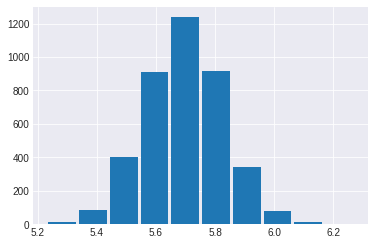

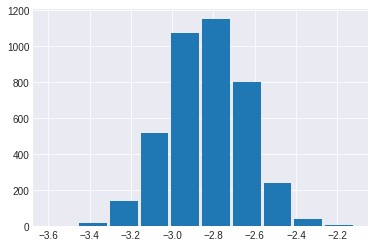

In [105]:
plt.hist(alpha, rwidth=0.9)
plt.show()

plt.hist(beta, rwidth=0.9)
plt.show()

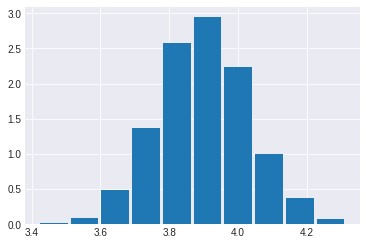

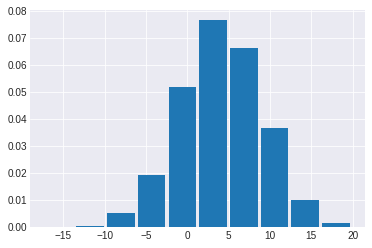

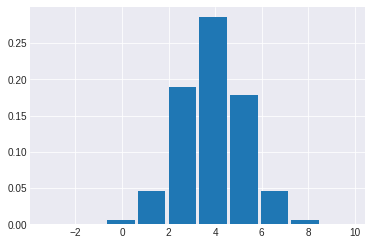

In [106]:
plt.hist(mu, density=True, rwidth=0.9)
plt.show()

plt.hist(priori_mu, density=True, rwidth=0.9)
plt.show()

plt.hist(y_priori_sim, density=True, rwidth=0.9)
plt.show()